#Airfare Price Prediction

### Importing Libraries


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Loading the dataset

In [104]:
data=pd.read_excel("Data_Train.xlsx")

In [105]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [106]:
data.shape

(10683, 11)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Data Cleaning

In [108]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [109]:
# Dropping null rows
data.dropna(inplace=True)

In [110]:
# Removing Duplicates
data.drop_duplicates(keep='first',inplace=True)

### Feature Engineering

In [111]:
# Converting Duration format into minutes

def duration(test):
  test=test.strip()
  total=test.split(' ')
  to=total[0]
  hrs=(int)(to[:-1])*60
  if(len(total)==2):
    mint=(int)(total[1][:-1])
    hrs=hrs+mint
  test=int(hrs)
  return test
data["Duration"]=data["Duration"].apply(duration)

In [112]:
# Converting Date of Journey
data['Date']=data['Date_of_Journey'].str.split('/').str[0].astype(int)
data['Month']=data['Date_of_Journey'].str.split('/').str[1].astype(int)
data['Year']=data['Date_of_Journey'].str.split('/').str[2].astype(int)

In [113]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,2019


In [114]:
data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [115]:
#Arrival time
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [116]:
#Departure time
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [117]:
# Total Stops
data['Total_Stops'].replace(['non-stop','1 stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [118]:
data["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [119]:
data.drop(["Additional_Info"],axis=1,inplace=True)

In [120]:
# Route and Total_Stops does the same thing, hence dropping route

data.drop(["Route"], axis=1, inplace=True)

###Categorical to Numerical Data

In [121]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

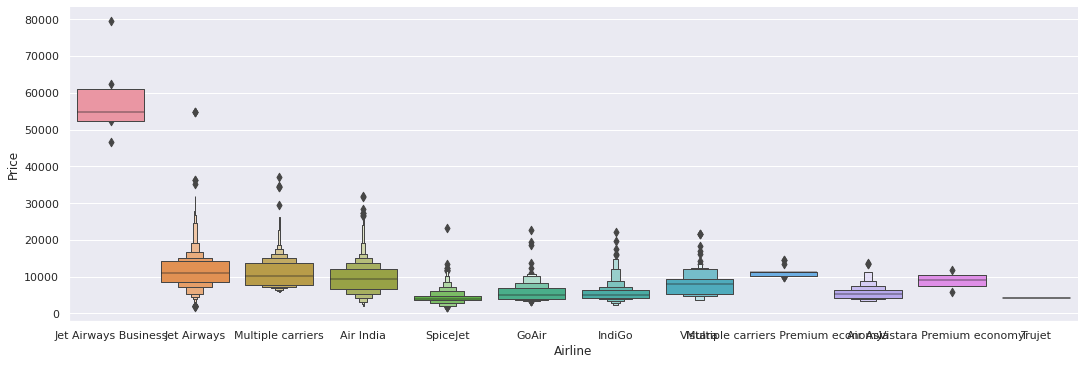

In [122]:
sns.catplot(y="Price", x="Airline", data=data.sort_values("Price",ascending=False),kind="boxen" ,height=5,aspect=3)
plt.show()

In [123]:
Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)  # we will drop first feature which is not required

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [124]:
data["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

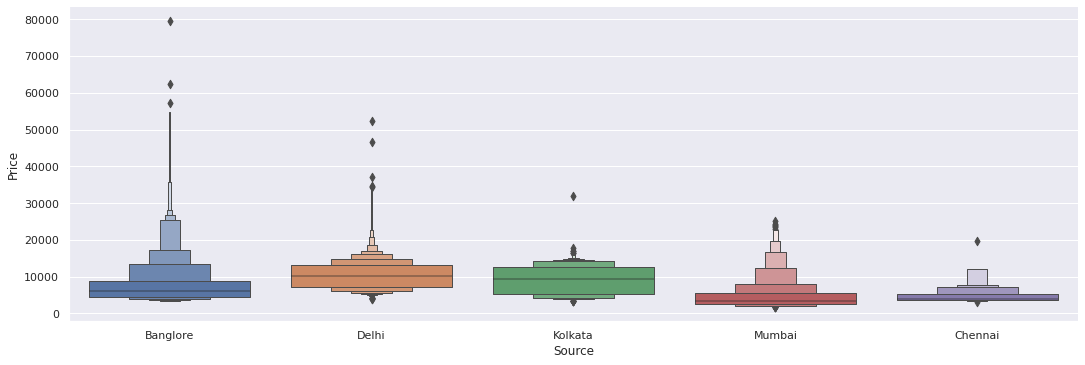

In [125]:
sns.catplot(x = "Source",y = "Price", data = data.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.show()

In [126]:
Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [127]:
data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

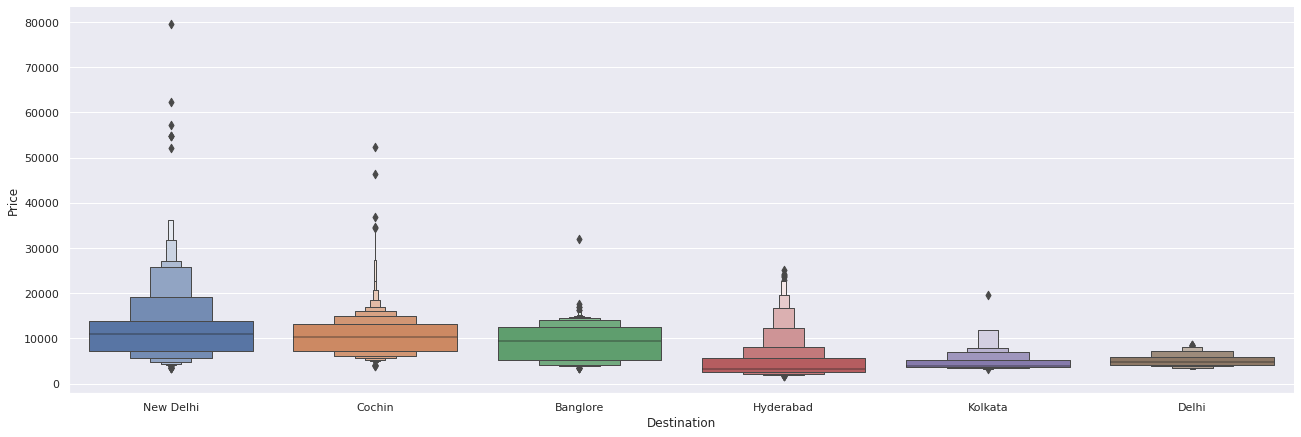

In [128]:
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [129]:
Destination = data[['Destination']]
Destination = pd.get_dummies(Destination , drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [130]:
# Concatenate the above dataframes with original data
data = pd.concat([data ,Airline,Source,Destination] ,axis=1)

In [131]:
# Dropping the Airline, Source, Destination Columns

data.drop(["Airline" , "Source", "Destination"] ,  axis=1 , inplace =True)
data.head()

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,1,3897,24,3,2019,1,10,22,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,2019,13,15,5,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,2019,4,25,9,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,0,6218,12,5,2019,23,30,18,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,0,13302,1,3,2019,21,35,16,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Duration                                   10462 non-null  int64
 1   Total_Stops                                10462 non-null  int64
 2   Price                                      10462 non-null  int64
 3   Date                                       10462 non-null  int64
 4   Month                                      10462 non-null  int64
 5   Year                                       10462 non-null  int64
 6   Arrival_hour                               10462 non-null  int64
 7   Arrival_min                                10462 non-null  int64
 8   Dep_hour                                   10462 non-null  int64
 9   Dep_min                                    10462 non-null  int64
 10  Airline_Air India                          104

In [133]:
data.shape

(10462, 30)

### Building Machine Learning Models

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [135]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split
y=data["Price"]
data.drop(["Price"],axis=1,inplace=True)
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [136]:
def rmse(y_test,y_pred):
  return np.sqrt(mean_squared_error(y_test,y_pred))

In [137]:
def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

## 1. Linear Regression

In [158]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
#Training
LR.fit(X_train,y_train)

#Prediction
y_pred_LR=LR.predict(X_test)

#Evaluation
eval1=[rmse(y_test,y_pred_LR),r2_score(y_test,y_pred_LR),mean_absolute_percentage_error(y_test,y_pred_LR)]
print("Root Mean Squared Error = {}".format(rmse(y_test,y_pred_LR)))
print("r2 score = {}".format(r2_score(y_test,y_pred_LR)))
print("Mean Absolute Percentage Error = {}%".format(round(mean_absolute_percentage_error(y_test,y_pred_LR))))


Root Mean Squared Error = 3008.5529450096947
r2 score = 0.5641788455760792
Mean Absolute Percentage Error = 27%


##2. Ridge Regression

In [139]:
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha' :[0.0001, 0.0009, 0.001, 0.05, 0.01, 0.1, 1, 10, 50, 80, 100, 500, 1000, 10000, 100000]}
ridge_regression=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_regression.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0009, 0.001, 0.05, 0.01, 0.1, 1,
                                   10, 50, 80, 100, 500, 1000, 10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [140]:
y_pred_ridge=ridge_regression.predict(X_test)

In [159]:
print("Root Mean Squared Error = {}".format(np.sqrt(-ridge_regression.best_score_)))
print("r2 score = {}".format(r2_score(y_test,y_pred_ridge)))
print("Mean Absolute Percentage Error = {}%".format(round(mean_absolute_percentage_error(y_test,y_pred_ridge))))
eval2=[np.sqrt(-ridge_regression.best_score_),r2_score(y_test,y_pred_ridge),round(mean_absolute_percentage_error(y_test,y_pred_ridge))]

Root Mean Squared Error = 3024.027319709857
r2 score = 0.5641787167290976
Mean Absolute Percentage Error = 27%


## 3. Lasso Regression

In [142]:
from sklearn.linear_model import Lasso
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [143]:
y_pred_lasso =lasso_regressor.predict(X_test)

In [160]:
print("Root Mean Squared Error = {}".format(rmse(y_test,y_pred_lasso)))
print("r2 score = {}".format(r2_score(y_test,y_pred_lasso)))
print("Mean Absolute Percentage Error = {}%".format(round(mean_absolute_percentage_error(y_test,y_pred_lasso))))
eval3=[rmse(y_test,y_pred_lasso),r2_score(y_test,y_pred_lasso),round(mean_absolute_percentage_error(y_test,y_pred_lasso))]

Root Mean Squared Error = 3010.271116923256
r2 score = 0.5636809121819895
Mean Absolute Percentage Error = 27%


## 4. Multi-layer Perceptron

In [161]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)
MLP = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train_scaled, y_train)
y_pred_MLP=MLP.predict(X_test_scaled)
print("Root Mean Squared Error = {}".format(rmse(y_test,y_pred_MLP)))
print("r2 score = {}".format(r2_score(y_test,y_pred_MLP)))
print("Mean Absolute Percentage Error = {}%".format(round(mean_absolute_percentage_error(y_test,y_pred_MLP))))
eval4=[rmse(y_test,y_pred_MLP),r2_score(y_test,y_pred_MLP),round(mean_absolute_percentage_error(y_test,y_pred_MLP))]

Root Mean Squared Error = 2094.0857931269775
r2 score = 0.7888544512859219
Mean Absolute Percentage Error = 17%


## 5. Random Forest Regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
params={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
forest_regressor = RandomizedSearchCV(RandomForestRegressor(), params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
forest_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [149]:
y_pred_forest=forest_regressor.predict(X_test)


In [162]:
print("Root Mean Squared Error = {}".format(rmse(y_test,y_pred_forest)))
print("r2 score = {}".format(r2_score(y_test,y_pred_forest)))
print("Mean Absolute Percentage Error = {}%".format(round(mean_absolute_percentage_error(y_test,y_pred_forest))))
eval5=[rmse(y_test,y_pred_forest),r2_score(y_test,y_pred_forest),round(mean_absolute_percentage_error(y_test,y_pred_forest))]

Root Mean Squared Error = 1891.357341382289
r2 score = 0.8277575602758914
Mean Absolute Percentage Error = 13%


##6. XGBoost

In [152]:
from xgboost import XGBRegressor
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

[21:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [153]:
y_pred_xgboost=model.predict(X_test)

In [163]:
print("Root Mean Squared Error = {}".format(rmse(y_test,y_pred_xgboost)))
print("r2 score = {}".format(r2_score(y_test,y_pred_xgboost)))
print("Mean Absolute Percentage Error = {}%".format(round(mean_absolute_percentage_error(y_test,y_pred_xgboost))))
eval6=[rmse(y_test,y_pred_xgboost),r2_score(y_test,y_pred_xgboost),round(mean_absolute_percentage_error(y_test,y_pred_xgboost))]

Root Mean Squared Error = 1937.3201720018067
r2 score = 0.8192843390822033
Mean Absolute Percentage Error = 15%


##7. Decision Tree Regression


In [155]:
from sklearn.tree import DecisionTreeRegressor
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [156]:
y_pred_tree =tree.predict(X_test)

In [169]:
print("Root Mean Squared Error = {}".format(rmse(y_test,y_pred_tree)))
print("r2 score = {}".format(r2_score(y_test,y_pred_tree)))
print("Mean Absolute Percentage Error = {}%".format(round(mean_absolute_percentage_error(y_test,y_pred_tree))))
eval7=[rmse(y_test,y_pred_tree),r2_score(y_test,y_pred_tree),round(mean_absolute_percentage_error(y_test,y_pred_tree))]

Root Mean Squared Error = 2260.7734843716244
r2 score = 0.7539025627657459
Mean Absolute Percentage Error = 16%


## Summary

In [167]:
models={'Linear Regression':eval1,
        'Ridge Regression':eval2,
        'Lasso Regression':eval3,
        'Multilayer Perceptron':eval4,
        'Random Forest Regression':eval5,
        'XGBoost':eval6,
        'Decision Tree':eval7}
summary=pd.DataFrame(data=models,index=['RMSE','r2 Score','Mean Absolute Percentage Error'])
summary

,Linear Regression,Ridge Regression,Lasso Regression,Multilayer Perceptron,Random Forest Regression,XGBoost,Decision Tree
RMSE,3008.552945,3024.027320,3010.271117,2094.085793,1891.357341,1937.320172,2260.773484
r2 Score,0.564179,0.564179,0.563681,0.788854,0.827758,0.819284,0.753903
Mean Absolute Percentage Error,27.130708,27.000000,27.000000,17.000000,13.000000,15.000000,16.000000
